In [2]:
# standard python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pydataset
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


# my modules
import src.env as env
import src.wrangle as wr


# module for fixing imported modules
from importlib import reload

# setting random seed to 7
np.random.seed(7)

## Exercises

In [6]:
df = wr.zillow_2017(small = True)

In [7]:
df.head()

,tax_value,bedrooms,baths,sq_feet,fips
31328,256239,3,1,1352,6037
21379,243234,4,3,2162,6111
19257,871232,3,3,3145,6037
5602,559030,3,2,1266,6059
39070,934000,5,3,2980,6111


## Question 1. 
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

In [8]:
to_int = list(df.columns)

In [9]:
to_int

['tax_value', 'bedrooms', 'baths', 'sq_feet', 'fips']

In [10]:
df[(list(df.columns))].astype(int).head()

,tax_value,bedrooms,baths,sq_feet,fips
31328,256239,3,1,1352,6037
21379,243234,4,3,2162,6111
19257,871232,3,3,3145,6037
5602,559030,3,2,1266,6059
39070,934000,5,3,2980,6111


In [14]:
# make, fit, use:
columns_to_scale = ['bedrooms', 'baths', 'sq_feet', 'fips']

In [13]:
df.count()

tax_value    12056
bedrooms     12056
baths        12056
sq_feet      12056
fips         12056
dtype: int64

In [18]:
df_scaled = pd.DataFrame()
# make the object, put it into the variable scaler
scaler = MinMaxScaler()
# fit the object to my data:
df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [72]:
def scale_df(df, scale = MinMaxScaler(), bins=10):
    #df = pd.DataFrame()
    columns_to_scale = ['bedrooms', 'baths', 'sq_feet', 'fips']
    df[columns_to_scale] = scale.fit_transform(df[columns_to_scale])
    
    return df

In [75]:
df1 = scale_df(df)
df2 = scale_df(df, scale=StandardScaler())
df3 = scale_df(df, scale=RobustScaler())

In [19]:
df_scaled.head()

,bedrooms,baths,sq_feet,fips
0,0.333333,0.000000,0.168734,0.000000
1,0.666667,0.666667,0.323344,1.000000
2,0.333333,0.666667,0.510975,0.000000
3,0.333333,0.333333,0.152319,0.297297
4,1.000000,0.666667,0.479481,1.000000


In [43]:
df.iloc[0]

tax_value    256239
bedrooms          3
baths             1
sq_feet        1352
fips           6037
Name: 31328, dtype: int64

In [89]:
def display_scale(df, scale):
    plt.figure(figsize=(10,10))
    n = 321
    for column in df:
        n+=1
        plt.subplot(n)
        plt.hist(df[column])
        plt.title(f'Distribution of {column} at {scale} scale')
        plt.xlabel(f'Number of {column}')
        plt.ylabel('Count')
        plt.subplots_adjust(hspace=.5) 
    plt.show()

In [80]:
scaled_dfs = (df, df1, df2, df3)
scale_type = ('Normal', 'MinMax', 'Standard', 'Robust')

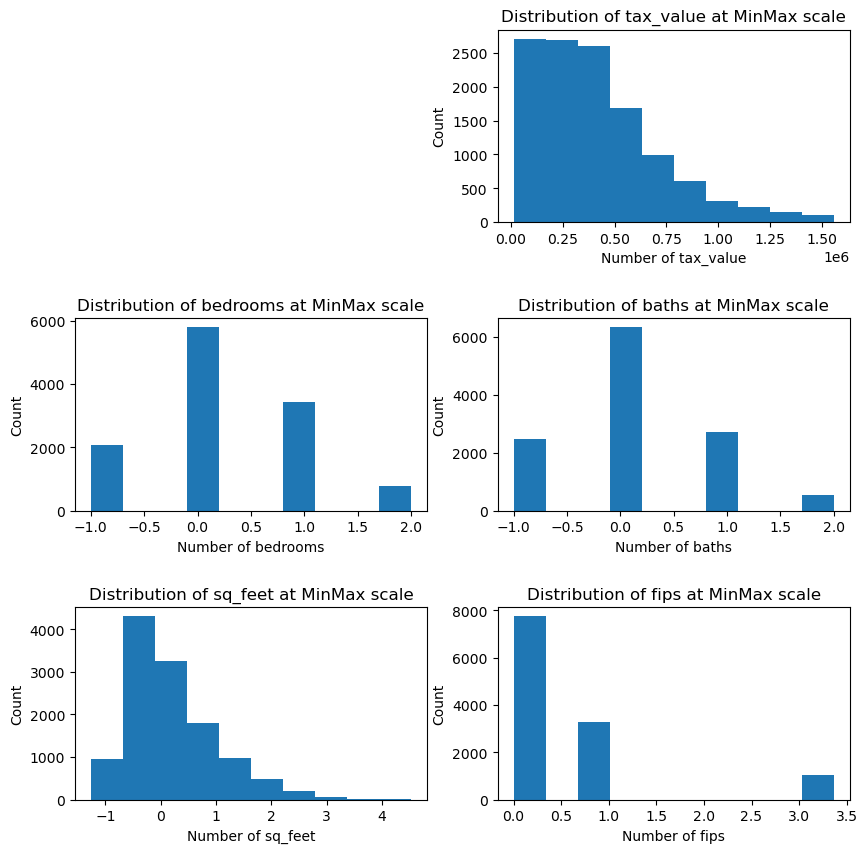

In [91]:
display_scale(df1, 'MinMax')

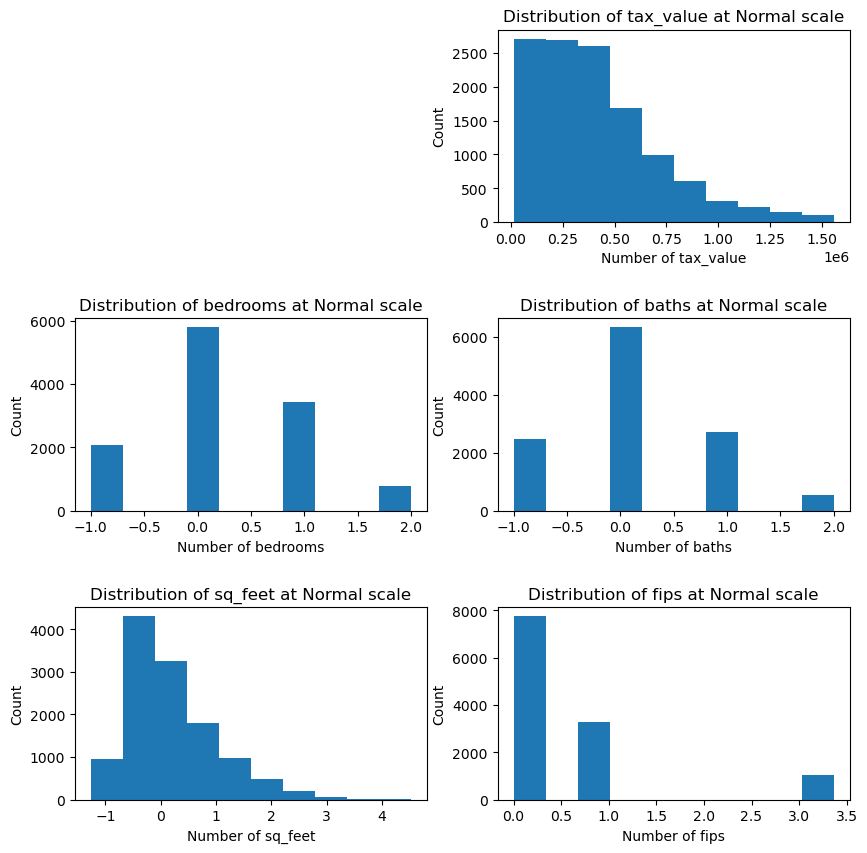

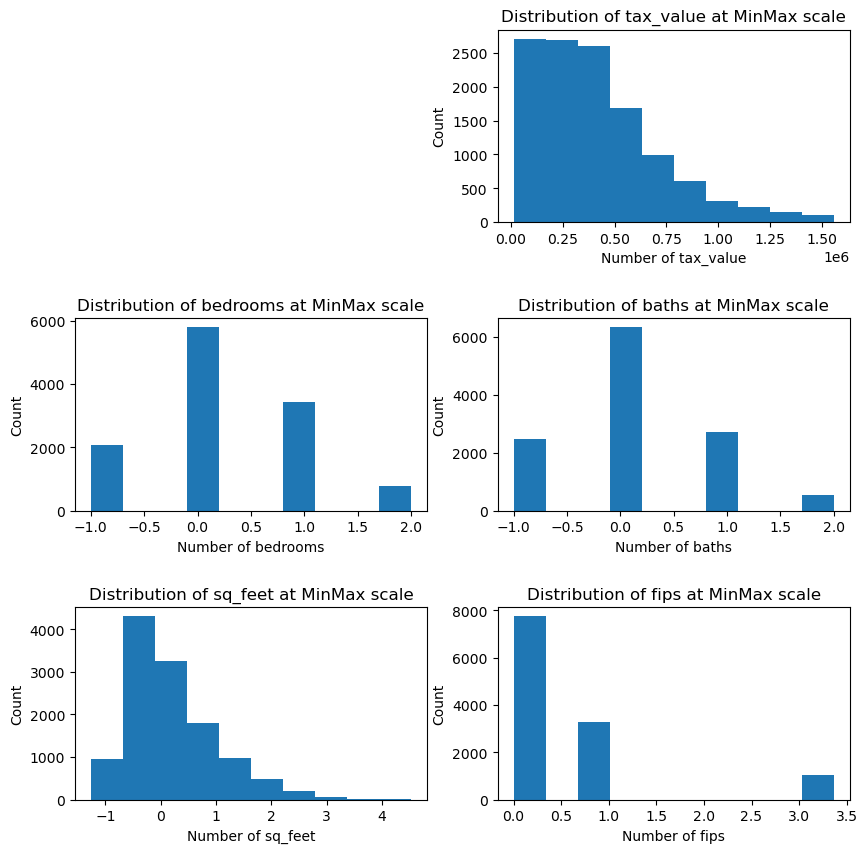

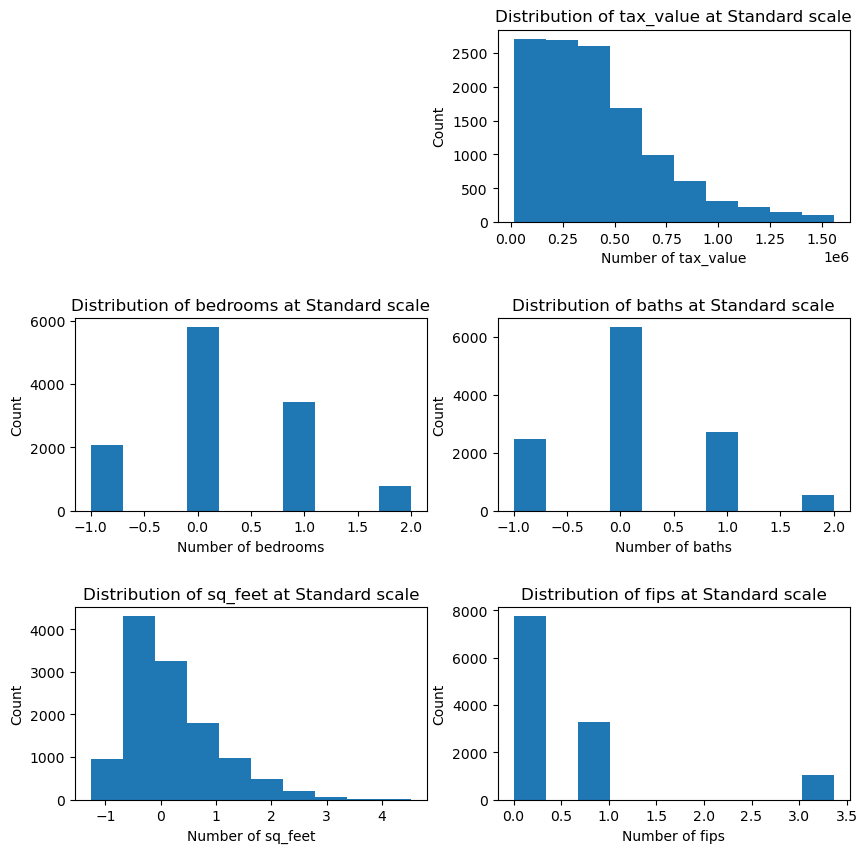

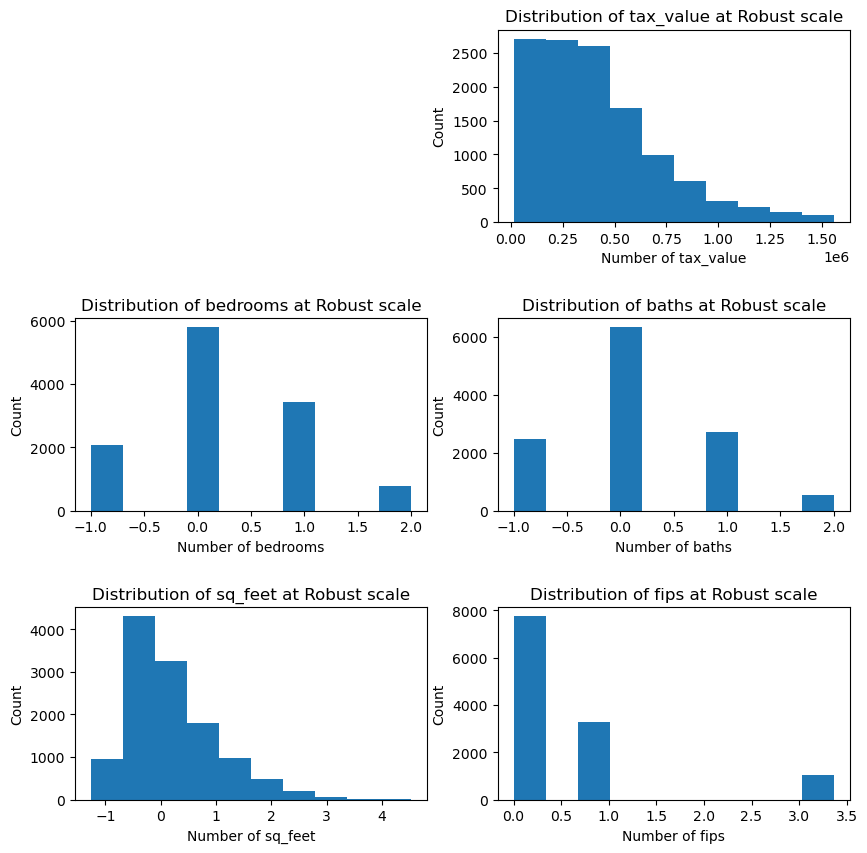

In [92]:
scaled_df = (df, df1, df2, df3)
scale_type = ('Normal', 'MinMax', 'Standard', 'Robust')
k = 0
for i in scaled_df:
    display_scale(i, scale_type[k])
    k+=1